#### Name: Maheen Syed
#### Email: maheen_syed@brown.edu
#### Klaviyo Assessment: 
### Questions: 
A) Assemble a dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)
Sort the dataframe by customer_id ascending and display the first 10 rows.

B) Plot the count of orders per week for the store.

C) Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant? Justify your choice of method.

D) Generate a confusion matrix for the gender predictions of customers in this dataset. You can assume that there is only one gender prediction for each customer. What does the confusion matrix tell you about the quality of the predictions?

E) Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. Limit your answer to one paragraph, and please be specific.

For each question, state any considerations or assumptions you made.

### Answers:

### Part A:

In [49]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import datetime as dt
from sklearn.metrics import confusion_matrix
from scipy import stats 


Import Data: 

In [2]:
df = pd.read_csv('screening_exercise_orders_v201810.csv')

In [3]:
df.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [4]:
df.shape 


(13471, 5)

Here I create a dateframe that contains the customer ID and the number of orders placed per customer in ascending order:

In [6]:
#Order Count:
oc = df["customer_id"].value_counts(sort=True, ascending=True)
len(oc) #shows unique customer id values
oc_df = oc.to_frame().reset_index()
oc_df_n = oc_df.rename(columns ={'index':'customer_id', 'customer_id':'order_count'})
oc_df_n.head()
oc_df_n.sort_values(by= 'customer_id', ascending =True).head()



,customer_id,order_count
4741,1000,1
3715,1001,1
8305,1002,3
8346,1003,4
1491,1004,1


Here I create a dataframe that contains the customer ID, gender, and the most recent order date per customer:

In [7]:
#Recent Orders
ro = df.groupby(['customer_id', 'gender'], sort= True)['date'] #Here we group by date so we get unique customers & their gender & the dates they placed orders
ro = ro.max() # The highest value from the date column

In [8]:
ro_df = ro.to_frame().reset_index()
ro_df.head()
ro_df_n = ro_df.rename(columns = {'date':'most_recent_order_date'}) #renamed
ro_df_n.head()


,customer_id,gender,most_recent_order_date
0,1000,0,2017-01-01 00:11:31
1,1001,0,2017-01-01 00:29:56
2,1002,1,2017-02-19 21:35:31
3,1003,1,2017-04-26 02:37:20
4,1004,0,2017-01-01 03:11:54


Finally, I merge the two previous dataframes in order to assemble the required dataframe with one row per customer and the following columns:

* customer_id
* gender
* most_recent_order_date
* order_count (number of orders placed by this customer)

The dataframe is sorted by customer_id ascending and displays the first 10 rows.


In [9]:
df_final = ro_df_n.merge(oc_df_n,how='outer',on='customer_id') 
df_final.head(10)

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:31,1
1,1001,0,2017-01-01 00:29:56,1
2,1002,1,2017-02-19 21:35:31,3
3,1003,1,2017-04-26 02:37:20,4
4,1004,0,2017-01-01 03:11:54,1
5,1005,1,2017-12-16 01:39:27,2
6,1006,1,2017-05-09 15:27:20,3
7,1007,0,2017-01-01 15:59:50,1
8,1008,0,2017-12-17 05:47:48,3
9,1009,1,2017-01-01 19:27:17,1


### Part B: 

In [10]:
df.head()
df.sort_values('date', ascending= True)
df['date'] = pd.to_datetime(df['date'])
df.dtypes

customer_id                  int64
gender                       int64
date                datetime64[ns]
value                      float64
predicted_gender             int64
dtype: object

In [11]:
df['Week_Number'] = df['date'].dt.strftime('%U') 
df['Week_Number'].value_counts()

20    554
41    413
48    395
21    392
26    359
03    356
19    341
47    341
14    337
10    319
27    319
08    314
24    311
15    305
50    287
04    287
40    284
34    283
11    272
09    271
25    264
02    259
18    251
29    245
37    239
12    237
07    233
51    230
16    228
23    227
49    226
13    226
52    224
28    221
35    221
36    210
05    209
17    209
22    203
39    200
06    198
30    192
33    186
32    185
31    184
46    183
42    175
45    175
01    175
38    172
44    159
43    150
53     35
Name: Week_Number, dtype: int64

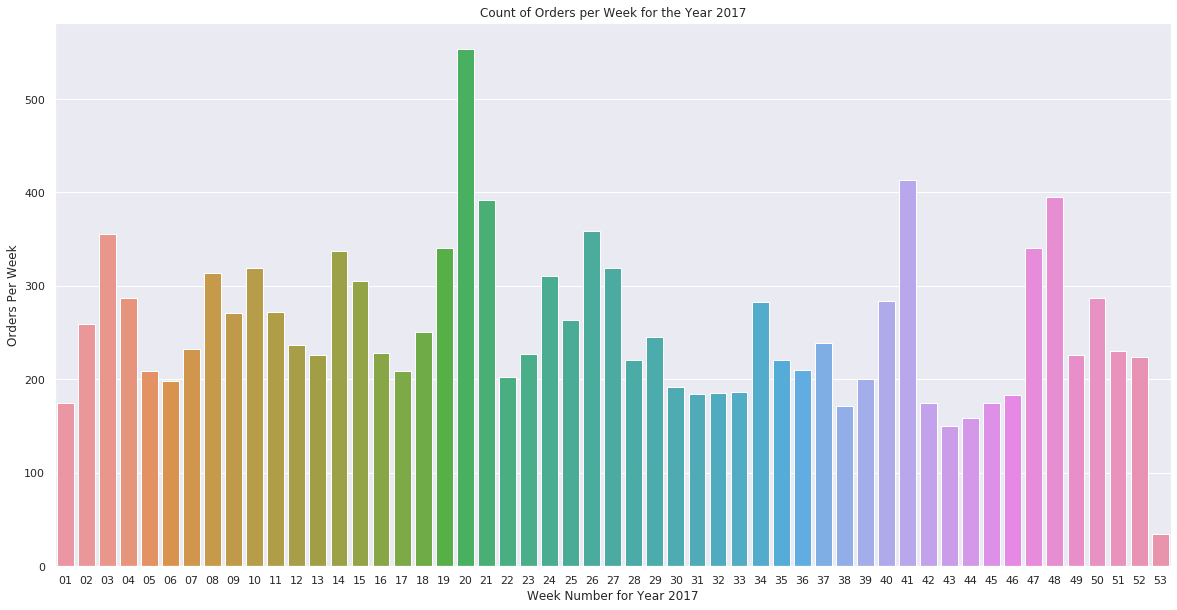

The assumption when calculating the Count of Orders per Week is that the first week starts from 1st January.


In [12]:
import seaborn as sb
sb.set(style="darkgrid")
plt.figure(figsize=(20,10))
ax = sb.countplot(x="Week_Number", data=df, linewidth=1)
ax.set(xlabel='Week Number for Year 2017', ylabel='Orders Per Week', title='Count of Orders per Week for the Year 2017')
plt.show()

print('The assumption when calculating the Count of Orders per Week is that the first week starts from 1st January.')

### Part C: 

In [61]:
mean_genders= df.groupby('gender').mean()
mean_genders['value']
a = mean_genders['value'][0]
b = mean_genders['value'][1]
print('Mean value for Gender 0 is: %s'%(a))
print('Mean value for Gender 1 is: %s:' %(b))

Mean value for Gender 0 is: 363.89000591803506
Mean value for Gender 1 is: 350.70836114422:


In [82]:
df['customer_id'].count()
N = (df['customer_id'].count())/2

In [81]:
var_g0 = df.groupby('gender')['value'].var(ddof=1)[0] #var gender 0
var_g1 = df.groupby('gender')['value'].var(ddof=1)[1] #var gender 1

s = np.sqrt((var_g0 + var_g1)/2) #std

t = (a - b)/(s*np.sqrt(2/N))

dof = 2*N - 2 

p = 1 - stats.t.cdf(t,df=dof)
p_n = 2*p

print("t value:%s"  %str(t))
print("p value: %s" %str(p_n))



t value:1.9759505628067568
p value: 0.04818075145872758


To determine whether the difference between the two means is significant or not, I used the two tailed t-test. The Null Hypothesis is that the mean order values are equal and the Alternative Hypothesis is that the mean order values are not equal. The  p-value obtained  is 0.04816 which is less than the alpha value of 0.05. Hence, the null hypothesis can be rejected in favor of the alternative hypothesis. It can be concluded that the difference in means between the genders is statistically significant. 

### Part D: 

In [40]:
y_true= df['gender']
y_pred = df['predicted_gender']

In [41]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[3349, 3410],
       [1463, 5249]])

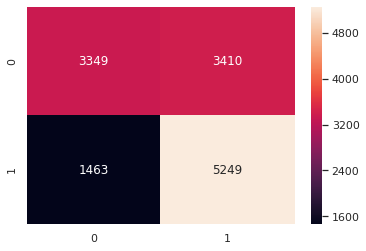

In [86]:
sb.heatmap(cm, annot=True, fmt='d')

In [91]:
y = df.iloc[:,-2].values

classes, counts = np.unique(y,return_counts=True)
print('balance:',np.max(counts/len(y)))

balance: 0.6427882117140524


* True Positives: 5249
* True Negatives:3349
* False Positives: 3410
* False Negatives:1463

Accuracy i.e fraction of data points correctly classified: TP+TN/(TP+TN+FP+FN) = 8598/13471 = 63.8%
The predictions are able to correctly classify the genders of customers with a 63.8% accuracy rate. 
There are a high number of False Positives (3410 data points misclassified gender 0 as gender 1). 
The prediction accuracy of the model is slightly lower than baseline accuracy of 64.3%. 


### Part E: 

One of my favorite techniques for data analysis is the simple, yet efficient GridSearchCV implementation for Machine Learning modeling. I have relied on this mechanism for efficient parameter tuning and analysis for a wide range of ML techniques. I am actively using this tool for my Master's research project. Moreover, I am currently working with an Engineering Startup that is transitioning to predictive modelling as one of their solutions. I am actively using GridSearchCV to investigate ideal ML models that will fit the solutions that the company has in mind.  